<a href="https://www.kaggle.com/code/mkowalsky/weather-prediction?scriptVersionId=106380021" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/kaggle/input/weather-prediction/weather_prediction_dataset.csv
/kaggle/input/weather-prediction/metadata.txt
/kaggle/input/weather-prediction/weather_prediction_bbq_labels.csv


In [2]:
# Reading weather dataset
df = pd.read_csv('/kaggle/input/weather-prediction/weather_prediction_dataset.csv')
labels = pd.read_csv('/kaggle/input/weather-prediction/weather_prediction_bbq_labels.csv')

In [3]:
# DataFrame of the dataset
df.head(4)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8


In [4]:
# DF informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


In [5]:
# DataFrame with labels
labels.head(4)

,DATE,BASEL_BBQ_weather,BUDAPEST_BBQ_weather,DE_BBQ_weather,DRESDEN_BBQ_weather,DUSSELDORF_BBQ_weather,HEATHROW_BBQ_weather,KASSEL_BBQ_weather,LJUBLJANA_BBQ_weather,MAASTRICHT_BBQ_weather,MALMO_BBQ_weather,MONTELIMAR_BBQ_weather,MUENCHEN_BBQ_weather,OSLO_BBQ_weather,PERPIGNAN_BBQ_weather,SONNBLICK_BBQ_weather,STOCKHOLM_BBQ_weather,TOURS_BBQ_weather
0,20000101,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20000102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,20000103,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,20000104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# Checking missing values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


In [7]:
# Data analisys for BUDAPEST
df_budapest = pd.concat([df.iloc[:,:2],df.iloc[:,11:19]],axis=1)
df_budapest['DATE'] = pd.to_datetime(df_budapest['DATE'],format='%Y%m%d')

In [8]:
def mean_for_mth(feature):
    mean = []
    for x in range(12):
        mean.append(
            float("{:.2f}".format(df_budapest[df_budapest['MONTH'] == (x+1)][feature].mean())))
    return mean

Text(0, 0.5, 'DEGREE')

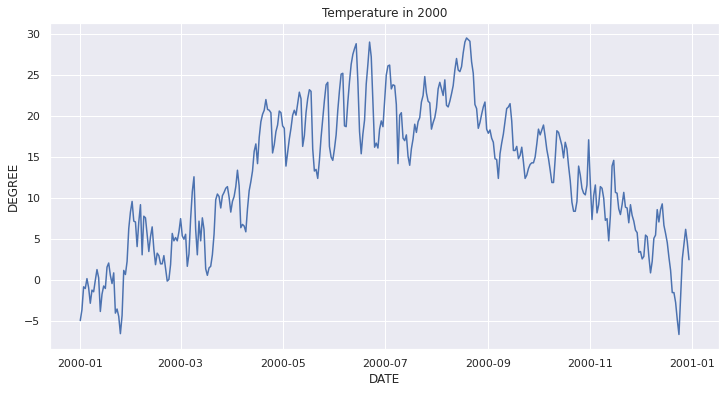

In [9]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
plt.plot(df_budapest['DATE'][:365],df_budapest['BUDAPEST_temp_mean'][:365])
plt.title('Temperature in 2000')
plt.xlabel('DATE')
plt.ylabel('DEGREE')

[Text(0, 0, '0.85'),
 Text(0, 0, '2.78'),
 Text(0, 0, '6.91'),
 Text(0, 0, '13.13'),
 Text(0, 0, '18.03'),
 Text(0, 0, '20.97'),
 Text(0, 0, '22.67'),
 Text(0, 0, '22.37'),
 Text(0, 0, '16.98'),
 Text(0, 0, '12.42'),
 Text(0, 0, '6.94'),
 Text(0, 0, '1.57')]

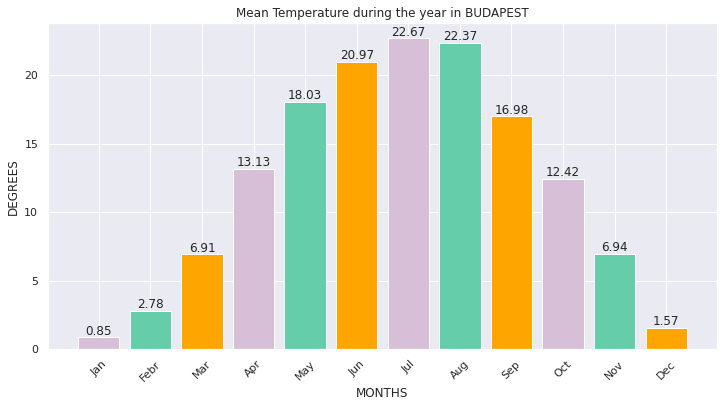

In [10]:
months = ['Jan', 'Febr', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
          'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
mean_temp = mean_for_mth('BUDAPEST_temp_mean')
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
bar = plt.bar(x = months,height = mean_temp, width = 0.8, color=['thistle','mediumaquamarine',                'orange'])
plt.xticks(rotation = 45)
plt.xlabel('MONTHS')
plt.ylabel('DEGREES')
plt.title('Mean Temperature during the year in BUDAPEST')
plt.bar_label(bar)

[Text(0, 0, '0.77'),
 Text(0, 0, '0.71'),
 Text(0, 0, '0.64'),
 Text(0, 0, '0.55'),
 Text(0, 0, '0.56'),
 Text(0, 0, '0.57'),
 Text(0, 0, '0.58'),
 Text(0, 0, '0.59'),
 Text(0, 0, '0.64'),
 Text(0, 0, '0.72'),
 Text(0, 0, '0.77'),
 Text(0, 0, '0.79')]

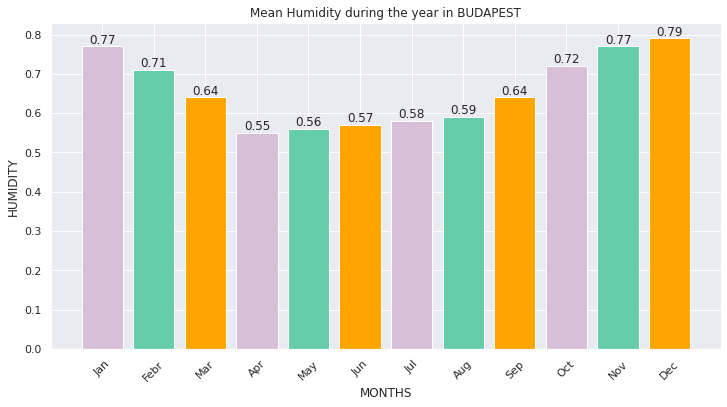

In [11]:
sns.set(style="darkgrid")
mean_temp = mean_for_mth('BUDAPEST_humidity')
plt.figure(figsize=(12,6))
bar = plt.bar(x = months, height = mean_temp, width = 0.8, color=['thistle','mediumaquamarine',                'orange'])
plt.xticks(rotation = 45)
plt.xlabel('MONTHS')
plt.ylabel('HUMIDITY')
plt.title('Mean Humidity during the year in BUDAPEST')
plt.bar_label(bar)

In [12]:
df_budapest.drop(['MONTH'],axis=1).describe()

,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_max
count,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,4.890531,0.656505,1.016935,1.465487,0.136442,5.753229,12.174849,16.629091
std,2.386442,0.149603,0.007795,0.977986,0.408932,4.475439,8.744451,9.981538
min,0.000000,0.260000,0.989100,0.040000,0.000000,0.000000,-9.800000,-6.600000
25%,3.000000,0.540000,1.012100,0.580000,0.000000,1.100000,5.100000,8.400000
50%,5.000000,0.650000,1.016500,1.340000,0.000000,5.900000,12.800000,17.400000
75%,7.000000,0.770000,1.021475,2.310000,0.030000,9.600000,19.300000,25.000000
max,8.000000,1.000000,1.043800,3.490000,6.960000,14.900000,33.100000,40.100000


<AxesSubplot:xlabel='BUDAPEST_global_radiation', ylabel='Count'>

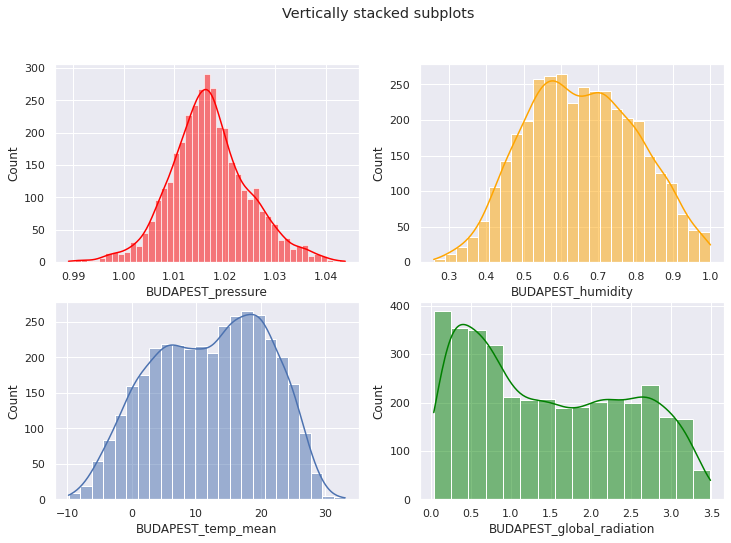

In [13]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(12,8))
fig.suptitle('Vertically stacked subplots')
sns.histplot(data = df_budapest, x ='BUDAPEST_pressure', ax=axs[0,0], color='red', kde=True)
sns.histplot(data = df_budapest, x ='BUDAPEST_humidity', ax=axs[0,1], color='orange', kde=True)
sns.histplot(data = df_budapest, x ='BUDAPEST_temp_mean', ax=axs[1,0], kde=True)
sns.histplot(data = df_budapest, x ='BUDAPEST_global_radiation', ax=axs[1,1], color='green', kde=True)

[Text(0.5, 1.0, 'Labels for BUDAPEST')]

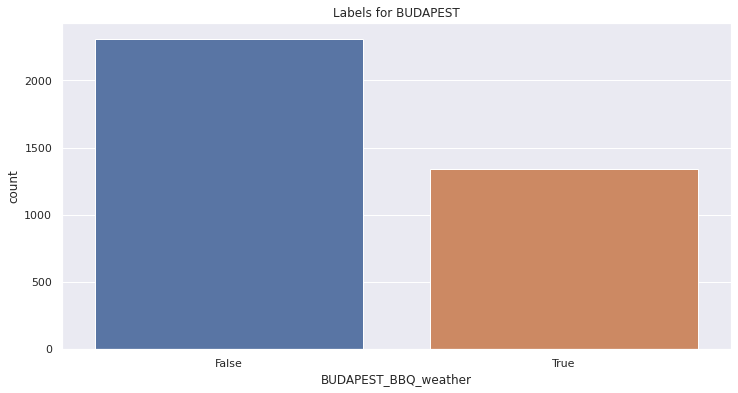

In [14]:
labels_budapest = labels['BUDAPEST_BBQ_weather']
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
sns.countplot(x = labels_budapest).set(title='Labels for BUDAPEST')

In [15]:
true_val = len(labels_budapest[labels_budapest == True])
false_val = len(labels_budapest[labels_budapest == False])
print('Precent of True values: {0:.2f}%'.format(true_val/(true_val+false_val)*100))
print('Precent of False values: {0:.2f}%'.format(false_val/(true_val+false_val)*100))

Precent of True values: 36.75%
Precent of False values: 63.25%


In [16]:
labels_budapest = labels_budapest.astype(int)
df_budapest = df_budapest.drop(['DATE'],axis=1)

[Text(0.5, 1.0, '')]

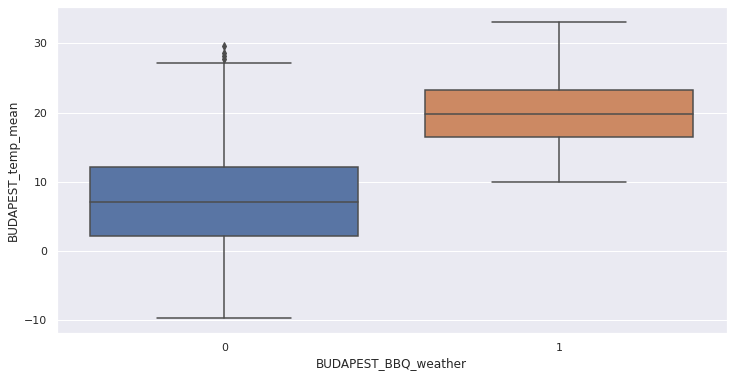

In [17]:
labels_budapest = labels_budapest.astype(int)
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.boxplot(y = df_budapest['BUDAPEST_temp_mean'], x = labels_budapest).set(title='')

In [18]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
ovrspl_X, ovrspl_y  = oversample.fit_resample(df_budapest, labels_budapest)

[Text(0.5, 1.0, 'Oversampled Labels for BUDAPEST')]

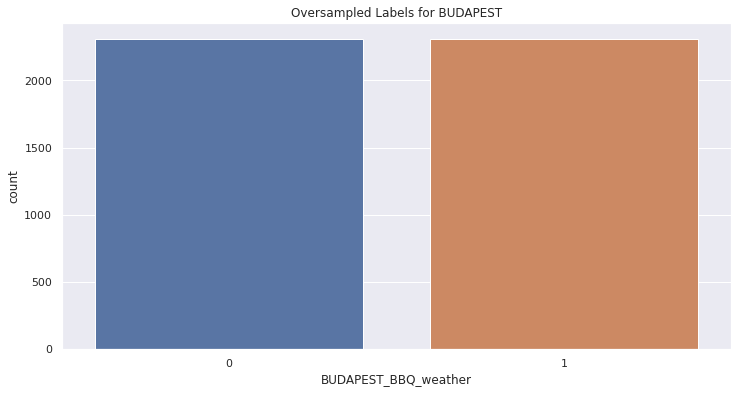

In [19]:
labels_budapest = labels['BUDAPEST_BBQ_weather']
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
sns.countplot(x = ovrspl_y).set(title='Oversampled Labels for BUDAPEST')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'MONTH'),
  Text(1.5, 0, 'BUDAPEST_cloud_cover'),
  Text(2.5, 0, 'BUDAPEST_humidity'),
  Text(3.5, 0, 'BUDAPEST_pressure'),
  Text(4.5, 0, 'BUDAPEST_global_radiation'),
  Text(5.5, 0, 'BUDAPEST_precipitation'),
  Text(6.5, 0, 'BUDAPEST_sunshine'),
  Text(7.5, 0, 'BUDAPEST_temp_mean'),
  Text(8.5, 0, 'BUDAPEST_temp_max')])

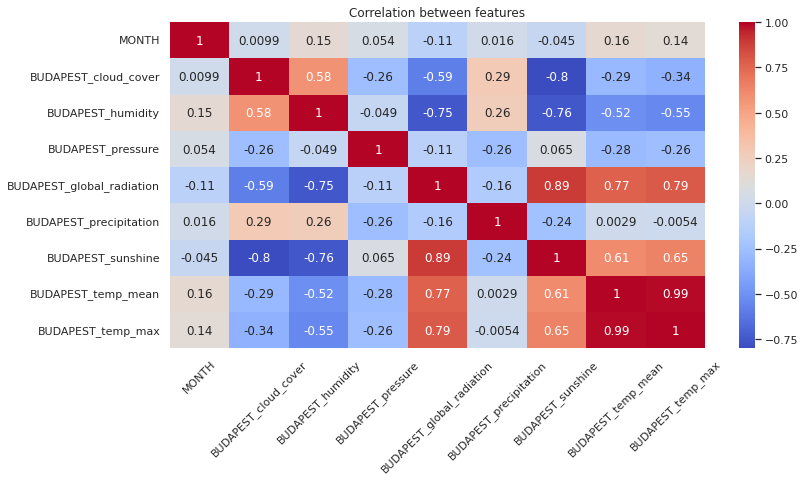

In [20]:
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.heatmap(df_budapest.corr(),annot=True,cmap='coolwarm').set(title='Correlation between features')
plt.xticks(rotation = 45)

In [21]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(ovrspl_X,ovrspl_y, test_size = 0.3, random_state = 42)
#print('Training set: ' + str(len(X_train)))
#print('Testing set: ' + str(len(X_test)))

In [22]:
#from tensorflow.keras.layers import LSTM, Dense